## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

## Loading file path

In [2]:
filepath = "D:\\CYBER ATTACK DETECTION PROJECT\\DATASET\\Final Dataset for comparision.csv"

In [3]:
# Loading the dataset

df = pd.read_csv(filepath, nrows=10000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [5]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration            float64
 1   orig_bytes          int64  
 2   resp_bytes          int64  
 3   missed_bytes        float64
 4   orig_pkts           float64
 5   orig_ip_bytes       float64
 6   resp_pkts           float64
 7   resp_ip_bytes       float64
 8   label               object 
 9   misses_bytes        float64
 10  conn_state_encoded  int64  
 11  proto_encoded       int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 915.5+ MB


In [6]:
# statistical measures on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,conn_state_encoded,proto_encoded
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,-8.437321e-02,1.824957e+02,2.934570e+00,2.150090e-02,2.002007e+00,2.761713e+02,3.416330e-02,5.571225e+00,-9.927626e-01,5.986300e+00,1.039763e+00
std,4.382422e+01,5.522816e+05,3.698325e+03,1.535074e+01,4.128157e+02,5.638333e+05,6.231040e+00,3.860911e+03,4.932938e+00,4.438511e-01,2.056215e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
max,9.328003e+04,1.744830e+09,1.166102e+07,2.027200e+04,1.305034e+06,1.781371e+09,9.307000e+03,1.207699e+07,5.792000e+03,1.200000e+01,2.000000e+00


In [7]:
df.shape

(10000000, 12)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'conn_state_encoded', 'proto_encoded'],
      dtype='object')

In [9]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [10]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     6273278
Benign                        1818231
Okiru                         1628670
DDoS                           264133
C&C                              7298
Attack                           6943
C&C-HeartBeat                    1345
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

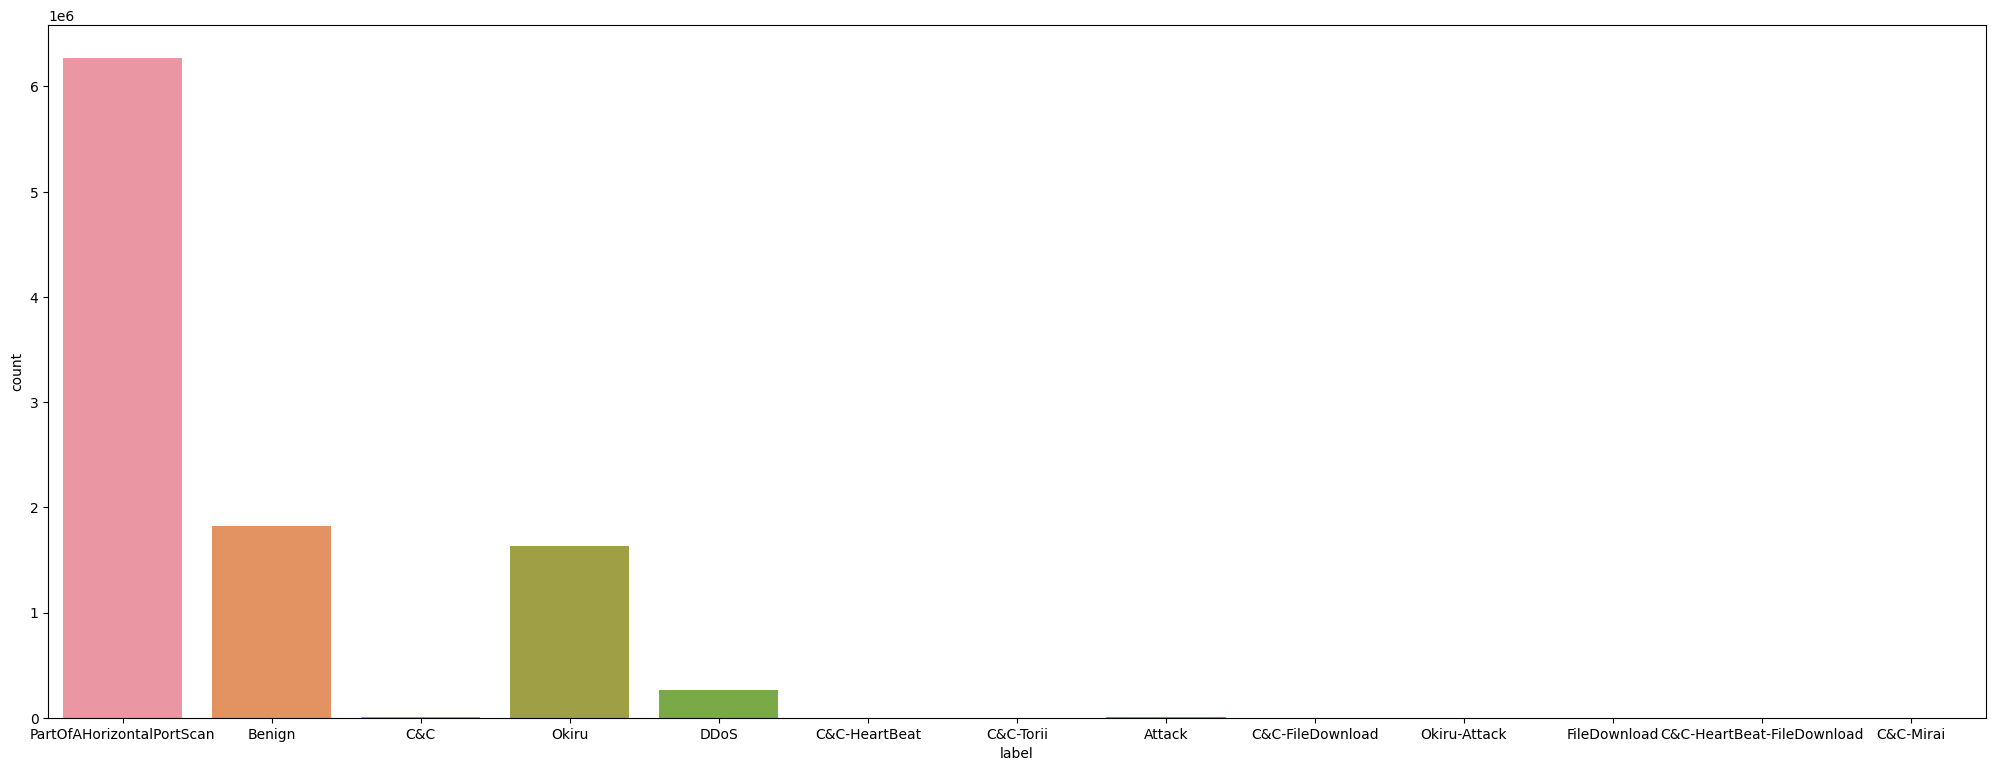

In [11]:
plt.figure(figsize = (25,9))
sns.countplot(x = df['label'])

In [12]:
df['label'] = df['label'].replace(['PartOfAHorizontalPortScan','Okiru','Okiru-Attack','DDoS','C&C','Attack','C&C-HeartBeat','C&C-FileDownload','C&C-Torii','FileDownload','C&C-HeartBeat-FileDownload','C&C-Mirai'], 'Malignant')
df['label'].value_counts()

label
Malignant    8181769
Benign       1818231
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

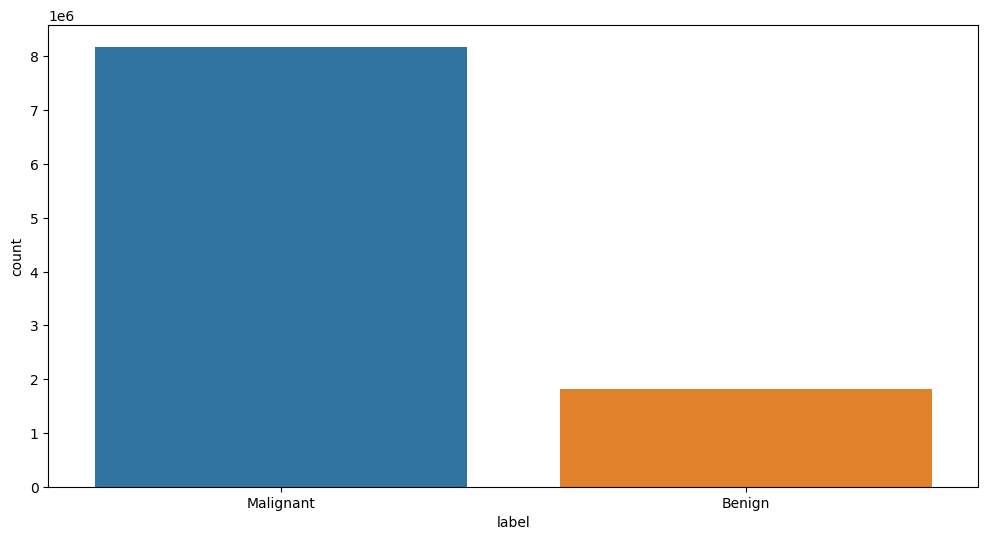

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['label'])

In [14]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_encoded', 'conn_state_encoded']

In [15]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_encoded
conn_state_encoded


In [16]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_encoded', 'conn_state_encoded']


In [17]:
df['label'].value_counts()

label
Malignant    8181769
Benign       1818231
Name: count, dtype: int64

## Changing the labels into numerical columns

In [18]:
df['label'].head()

0    Malignant
1    Malignant
2    Malignant
3       Benign
4       Benign
Name: label, dtype: object

In [19]:
# # Creating a instance of lable Encoder

# le = LabelEncoder()


# label = le.fit_transform(df['label'])

# label

In [20]:
# df.drop("label", axis=1, inplace=True)

# # Appending the array to our dataFrame
# # with column name 'Purchased'
# df["label"] = label

# # printing Dataframe
# df.head()


In [21]:
df['label'].value_counts()

label
Malignant    8181769
Benign       1818231
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

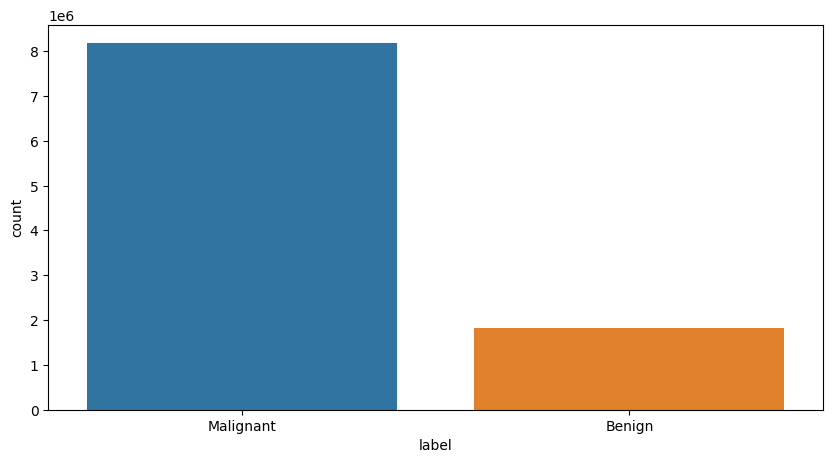

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['label'])

## Splitting the dataset into features and target

In [23]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_encoded', 'conn_state_encoded']]

# target
Y = df['label']

In [24]:
# shape of feature and target

print('Shape of feature : ',X.shape)
print('Shape of target : ',Y.shape)

Shape of feature :  (10000000, 11)
Shape of target :  (10000000,)


In [25]:
# scaler = StandardScaler()

# scaler.fit(X)
# X_standard = scaler.transform(X)

In [26]:
# print(X_standard)

## Splitting the dataset into features and target

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Training Random Forest Model

In [28]:
ny = GaussianNB()

# Train the classifier using the training data
ny.fit(X_train, Y_train)

# Test the classifier using the testing data
ny_acc = ny.score(X_test, Y_test)

print("Accuracy:", ny_acc)

Accuracy: 0.1821685


In [29]:
print('Random Forest Accuracy : ',ny_acc)
# print('Random Forest F1 Score : ',ny_f1)
# print('Random Forest Recall : ',ny_recall)
# print('Random Forest Precision : ',ny_precision)
# print('Random Forest Time : ',ny_time)

Random Forest Accuracy :  0.1821685


## Printing Classification Report

In [30]:
print('Random Forest Classifier : ')
print(classification_report(Y_test, ny_pred, zero_division=1))

Random Forest Classifier : 


NameError: name 'ny_pred' is not defined